In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Read in file
file = "Resources/NFL Arrest CSV.csv"
df = pd.read_csv(file, encoding="ISO-8859-1")
df.head(10) #956, 8
df = df.rename(columns={'TEAM' : 'team'})

In [4]:
file1 = "Resources/NFLteamWinsData.csv"
df1 = pd.read_csv(file1, encoding="ISO-8859-1")
df1 = pd.DataFrame(df1)
df1 = df1.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'year'])
df1.team = df1.team.replace({
    'Arizona Cardinals' : 'ARI',
    'Atlanta Falcons' : 'ATL',
    'Baltimore Ravens' : 'BAL',
    'Buffalo Bills' : 'BUF',
    'Carolina Panthers' : 'CAR',
    'Chicago Bears' : 'CHI',
    'Cincinnati Bengals' : 'CIN',
    'Cleveland Browns' : 'CLE',
    'Dallas Cowboys' : 'DAL',
    'Denver Broncos' : 'DEN',
    'Detroit Lions' : 'DET',
    'Green Bay Packers' : 'GB',
    'Houston Texans' : 'HOU',
    'Indianapolis Colts' : 'IND',
    'Jacksonville Jaguars' : 'JAX',
    'Kansas City Chiefs' : 'KC',
    'Los Angeles Chargers' : 'LAC',
    'Los Angeles Rams' : 'LAC',
    'Miami Dolphins' : 'MIA',
    'Minnesota Vikings' : 'MIN',
    'New England Patriots' : 'NE',
    'New Orleans Saints' : 'NO',
    'New York Giants' : 'NYG',
    'New York Jets' : 'NYJ',
    'Oakland Raiders' : 'OAK',
    'Philadelphia Eagles' : 'PHI',
    'Pittsburgh Steelers' : 'PIT',
    'San Diego Chargers' : 'SD',
    'San Francisco 49ers' : 'SF',
    'Seattle Seahawks' : 'SEA',
    'St. Louis Rams' : 'STL',
    'Tampa Bay Buccaneers' : 'TB',
    'Tennessee Titans' : 'TEN',
    'Washington Redskins' : 'WAS'})
df1 = df1.groupby('team').agg({'wins': 'sum', 
                         'win_percent': 'mean', 
                         'loses': 'sum'})
df1 = df1.reset_index()
df1 = df1.rename(columns={'win_percent' : 'average_win_percent'})
df1

,team,wins,average_win_percent,loses
0,ARI,142,0.425905,192
1,ATL,173,0.518143,161
2,BAL,197,0.586524,139
3,BUF,145,0.431762,191
4,CAR,164,0.489905,171
5,CHI,161,0.479476,175
6,CIN,147,0.442048,186
7,CLE,108,0.323190,227
8,DAL,173,0.515143,163
9,DEN,191,0.568714,145


In [5]:
crimeScatter = df.groupby('team').count()['POS'].sort_values(ascending=False)
crimeScatter = pd.DataFrame(crimeScatter)
crimeScatter = crimeScatter.reset_index()
crimeScatter

,team,POS
0,MIN,54
1,DEN,52
2,CIN,51
3,CLE,37
4,TB,37
5,JAC,37
6,IND,36
7,KC,36
8,TEN,36
9,MIA,34


In [6]:
merged_data = crimeScatter.merge(df1, on='team')
merged_data

,team,POS,wins,average_win_percent,loses
0,MIN,54,171,0.512095,163
1,DEN,52,191,0.568714,145
2,CIN,51,147,0.442048,186
3,CLE,37,108,0.323190,227
4,TB,37,150,0.446714,186
5,IND,36,207,0.616190,129
6,KC,36,174,0.518048,162
7,TEN,36,171,0.509238,165
8,MIA,34,158,0.470524,178
9,CHI,32,161,0.479476,175


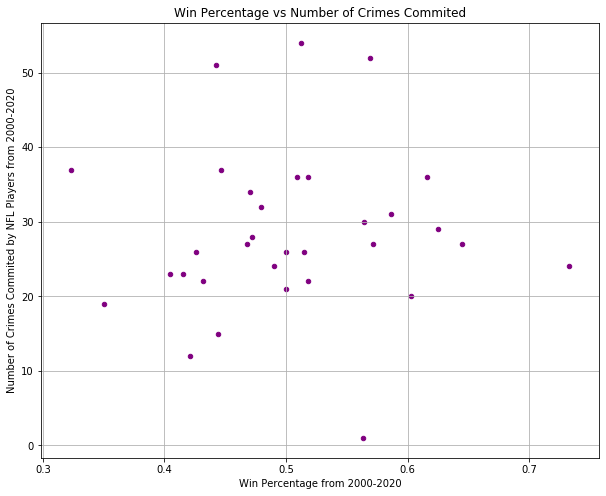

In [7]:
finishScatter = merged_data.plot.scatter(x='average_win_percent', y='POS', title='Win Percentage vs Number of Crimes Commited', grid=True, figsize=(10,8), color='purple')
finishScatter.set_xlabel("Win Percentage from 2000-2020")
finishScatter.set_ylabel('Number of Crimes Commited by NFL Players from 2000-2020')
finishScatter


In [8]:
x_values = merged_data['average_win_percent']
y_values = merged_data['POS']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression model is {line_eq} and the r^2 is {rvalue**2}')

The linear regression model is y = 4.05x + 26.33 and the r^2 is 0.0010566384151939401


In [9]:
#change x_values and y_values to regress different variables
def regression(df, title_name, y_label, x_label, xy):
    x_values = merged_data['average_win_percent']
    y_values = merged_data['POS']
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values, label='Teams', marker='o', c='purple')
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,color="red")
    plt.title(title_name)
    
    print(f"The r^2 is {rvalue}")

The r^2 is 0.03250597506911522


<function matplotlib.pyplot.show(*args, **kw)>

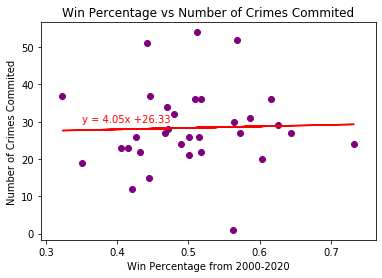

In [10]:
regression(merged_data, 'Win Percentage vs Number of Crimes Commited', 'Number of Crimes Commited', 'Win Percentage from 2000-2020', (.35,30)) 
plt.show
           
           

In [19]:
critical_value = st.chi2.ppf(q = 0.95, df = 955)
critical_value

1028.004881405531

In [20]:
st.chisquare(merged_data['average_win_percent'], merged_data['POS'])

Power_divergenceResult(statistic=876.3502136553168, pvalue=3.1376534716395534e-164)

In [ ]:
#Since the Chisquare value of 876.4 is lower than the critical value of 1028 we fail to reject the null.